In [39]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, assemble, Aer, visualization
import matplotlib.pyplot as plt
import itertools as it
import numpy as np
pi = np.pi

In [47]:
simulator = Aer.get_backend('qasm_simulator')
shots= 10000
sr, cr = QuantumRegister(2,'s'), ClassicalRegister(2)

In [48]:
## parameterized initial state for 2-qubit
def psi(circuit, qreg_q, y1 = pi/2, z1 = 0, y2 = 0, z2 = 0):
    circuit.ry(y1, qreg_q[0])
    circuit.ry(y2, qreg_q[1])
    circuit.rz(z1, qreg_q[0])
    circuit.rz(z2, qreg_q[1])
    circuit.cx(qreg_q[0], qreg_q[1])
    
## parameterized initial state for 3-qubit
def psi3(circuit, qreg_q, y1 = pi/2, z1 = pi/2, y2 = pi, z2 = -pi, y3 = pi/2, z3 = pi/2):    
    circuit.ry(y1, qreg_q[0])
    circuit.ry(y2, qreg_q[1])
    circuit.ry(y3 / 2, qreg_q[2])
    circuit.rz(z1, qreg_q[2])
    circuit.rz(z2, qreg_q[1])
    circuit.rz(z3, qreg_q[0])
    circuit.cx(qreg_q[0], qreg_q[2])
    circuit.cx(qreg_q[2], qreg_q[1])
    circuit.cx(qreg_q[0], qreg_q[2])

## parameterized measurement strategy    
def M(circuit, q, c, y = 0, z = 0):
    circuit.ry(y, q)
    circuit.rz(z, q)
    circuit.measure(q, c)
      

In [88]:
# type profile 
T = list(it.product((0,1),(0,1)))

## CHSH strategy
s = [(0, np.pi/4), (np.pi/8, -np.pi/8)]
chsh = {
    1: [(0,0), (-pi/2,0)],
    2: [(-pi/4,0), (pi/4,0)]
       }

(t1, t2) =  (0, 0)


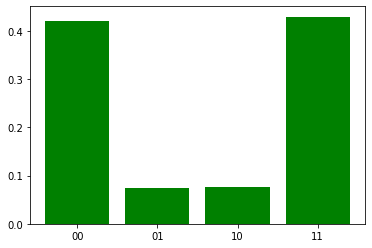

(t1, t2) =  (0, 1)


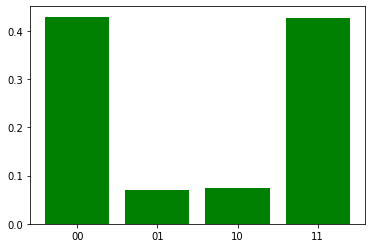

(t1, t2) =  (1, 0)


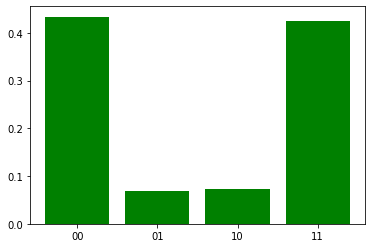

(t1, t2) =  (1, 1)


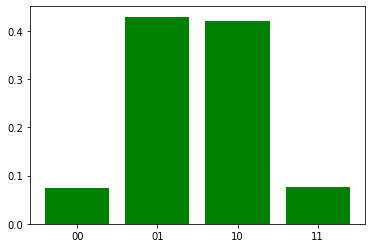

Winnin probability =  0.853675


In [89]:
e = 0
for t1, t2 in T:
    print("(t1, t2) = ",(t1, t2))
    qb = QuantumCircuit(sr, cr)

    psi(qb, sr, y1 = pi/2, z1 = 0, y2 = 0, z2 = 0)
    y1, z1 = chsh[1][t1]
    y2, z2 = chsh[2][t2]
    
    M(qb, sr[0], cr[0], y1, z1)
    M(qb, sr[1], cr[1], y2, z2)
    
    job = execute(qb, simulator, shots=shots)
    result = job.result()
    counts = result.get_counts(qb)
    c = dict(sorted(counts.items()))
    p = [i/shots for i in list(c.values())]
    plt.bar(list(c.keys()), p, color='g')
    plt.show()
    q = p + [0]*(4-len(p))
    e += 1/4*(q[0]+q[3] if t1&t2 == 0 else q[1] + q[2])
print('Winnin probability = ', e)

In [51]:
counts

{'11': 744, '01': 4232, '00': 756, '10': 4268}

In [86]:
np.cos(pi/8)**2

0.8535533905932737

In [84]:
[0,2] + [0]*0

[0, 2]

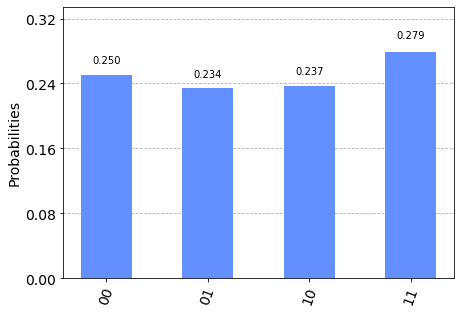

In [30]:
    psi(qb, sr)
    y1, z1 = chsh[1][1]
    y2, z2 = chsh[2][0]
    
    M(qb, sr[0], cr[0], y1, z1)
    M(qb, sr[1], cr[1], y2, z2)
    qb.draw()
    job = execute(qb, simulator, shots=shots)
    result = job.result()
    counts = result.get_counts(qb)
    visualization.plot_histogram(counts)

In [115]:
class player:
    def __init__(self, label, types = [0,1], actions = [0,1]):
        self.i = label
        self.Ti = types
        self.Ai = actions
    
    
class QB:
    def __init__(self, n=2):
        self.n = n
    
    ## player set
    N = range(2)
    
    ## player class array
    p = [player(i) for i in N]
    
    ## Ask user to input player features
    def ask():
        for i in N:
            print('______About player ' + str(i) + '______')
            p[i].Ti = input('Types for player '+str(i)+ ' (array):')
            p[i].Ai = input('Actions for player '+str(i)+ ' (array):')
            
    

In [117]:
g = QB()
g.ask()

TypeError: ask() takes 0 positional arguments but 1 was given

In [99]:
p = player()
p.Ti

[0, 1]

In [97]:
def pr(rho, M):
    return np.trace(np.dot(rho, M))    

In [ ]:
rho

In [109]:
g = QB(2)
g.N

2

In [120]:
def i():
 i = input('name')
i()

name 2


In [122]:
N = range(2)
    
    ## player class array
p = [player(i) for i in N]

In [134]:
for i in N:
    
    print('\n ______About player ' + str(i) + '______')
    p[i].Ti = list(range(int(input('number of Types for player '+str(i)+ ':'))))
    p[i].Ai = list(range(int(input('number of Actions for player '+str(i)+ ':'))))


 ______About player 0______


number of Types for player 0: 3
number of Actions for player 0: 4



 ______About player 1______


number of Types for player 1: 5
number of Actions for player 1: 3


In [135]:
list(p[1].Ti)

[0, 1, 2, 3, 4]

In [129]:
list('01')

TypeError: int() argument must be a string, a bytes-like object or a number, not 'list'

In [128]:
int('1')

1